In [1]:
import numpy as np
import math
from matplotlib import pyplot as py
%matplotlib inline

In [2]:
#now make meshgrid
N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)
X, Y = np.meshgrid(x, y)

In [3]:
gamma = 5.0
x_vortex, y_vortex = 0.0,0.0

In [5]:
def get_velocity_vor(strength, xv, yv, X, Y):
    u = +strength / (2 * math.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * math.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
    
    return u , v

In [6]:
def get_stream_vor(strength, xv, yv, X, Y):
    psi = strength / (4 * math.pi) * np.log((X - xv)**2 + (Y - yv)**2)
    
    return psi

In [7]:
# compute velocity field on mesh grid
u_vortex, v_vortex = get_velocity_vor(gamma, x_vortex, y_vortex, X, Y)

#get stream-function on mesh grid
psi_vortex = get_stream_vor(gamma, x_vortex, y_vortex, X, Y)

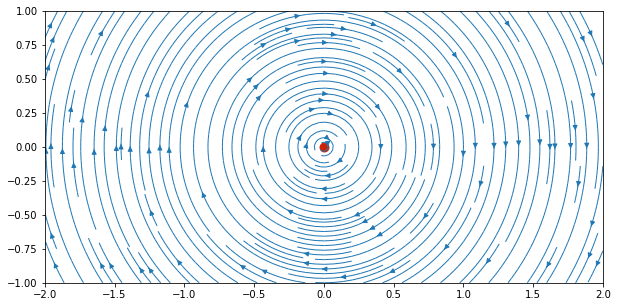

In [8]:
#plot streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
py.figure(figsize=(width, height))
py.xlim(x_start, x_end)
py.ylim(y_start, y_end)
py.streamplot(X, Y, u_vortex, v_vortex,
             density=2, linewidth=1, arrowsize=1)
py.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');

In [9]:
# now we will add in a sink to this vortex to see what happens
#to the streamlines

In [10]:
strength_sink = -1.0
x_sink, y_sink= 0.0, 0.0

In [11]:
def get_velocity_source(strength, xs, ys, X, Y):
    
    u = strength / (2 * math.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * math.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u , v

In [12]:
def get_stream_func_sink(strength, xs, ys, X, Y):
    psi = strength / (2 * math.pi) * np.arctan2((Y - ys), (X - xs))
    
    return psi

In [14]:
# compute the velocity field on mesh grid
u_sink, v_sink = get_velocity_sink(strength_sink, x_sink, y_sink, X, Y)

# compute stream function on mesh grid
psi_sink = get_stream_func_sink(strength_sink, x_sink, y_sink, X, Y)

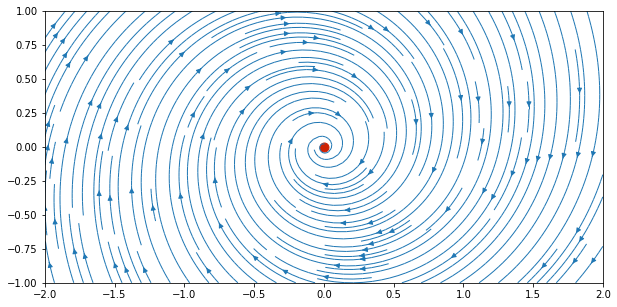

In [18]:
# superposition sink and vortex
u = u_vortex + u_sink
v = v_vortex + v_sink
psi = psi_vortex + psi_sink

# plot new streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
py.figure(figsize=(width, height))
py.xlim(x_start, x_end)
py.ylim(y_start, y_end)
py.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1)
py.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');